# Calibrate from multiple Sleap networks

(latest version on Github at https://github.com/tytell/tytell-lab.git)
This file from commit $Id$

Reequires (`sleap`)[https://sleap.ai/index.html] and `aniposelib` (version 0.6.1 or higher). Follow the directions to set up Sleap. Then  install `aniposelib` in the same python environment as Sleap: 
> % conda activate sleap

> % python -m pip install aniposelib

In [1]:
import os
import aniposelib

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import triangulate_sleap

Set up to detect a CHaRuCO board. Make sure you identify the number of squares and their size in mm. The numbers below should be correct for the board we have in the lab.

`marker_length`, `marker_bits`, and `dict_size` are particular to the sort of CHaRuCO board that we have in the lab. Don't change them unless you know what you're doing.

In [4]:
nsquaresx = 6
nsquaresy = 6

board = aniposelib.boards.CharucoBoard(squaresX=nsquaresx, squaresY=nsquaresy,
                                        square_length=24.33, marker_length=17, marker_bits=5, dict_size=50)

Fill in the path and the names of video files that have the CHaRuCO images. For paths on Windows machines, be careful not to remove the `r` at the beginning of the quote; without it, all backslashes will be registered as special characters.

In [10]:
videopath = r'/Users/etytel01/Documents/2024/StephenAcceleration/sleap/Pumpkinseed/11.15.23/11.15.23Calibration'
videonames = ['Charuco_camA.mp4', 'Charuco_camB.mp4', 'Charuco_camC.mp4']
camnames = ['camA', 'camB', 'camC']

videonames = [[os.path.join(videopath, vn1)] for vn1 in videonames]

# videopath = r'Raw data'
# videonames = ['9.5.22Calib-camA.mp4', '9.5.22Calib-camB.mp4', '9.5.22Calib-camC.mp4']

## Calibrate based on all the videos

This will run through all of the videos and detect the corners, then do the calibration and save it out as a `.toml` file

Adjust the file name below so that it corresponds to the date of the trial

In [ ]:
calibration_file_name = 'calibration.toml'

In [11]:
camgroup, boardpts = triangulate_sleap.calibrate_charuco(board, videonames, camnames, calibration_file_name)

/Users/etytel01/Documents/2024/StephenAcceleration/sleap/Pumpkinseed/11.15.23/11.15.23Calibration/Charuco_camA.mp4


100%|█████████████████████████████| 1302/1302 [00:52<00:00, 24.83it/s]


1302 boards detected
/Users/etytel01/Documents/2024/StephenAcceleration/sleap/Pumpkinseed/11.15.23/11.15.23Calibration/Charuco_camB.mp4


100%|█████████████████████████████| 1302/1302 [01:02<00:00, 20.89it/s]


1302 boards detected
/Users/etytel01/Documents/2024/StephenAcceleration/sleap/Pumpkinseed/11.15.23/11.15.23Calibration/Charuco_camC.mp4


100%|█████████████████████████████| 1302/1302 [00:50<00:00, 25.54it/s]


729 boards detected
[{'name': 'camA', 'size': [1920, 600], 'matrix': [[4693.512622685257, 0.0, 959.5], [0.0, 4693.512622685257, 299.5], [0.0, 0.0, 1.0]], 'distortions': [0.0, 0.0, 0.0, 0.0, 0.0], 'rotation': [0.0, 0.0, 0.0], 'translation': [0.0, 0.0, 0.0]}, {'name': 'camB', 'size': [1920, 800], 'matrix': [[3714.2492834914237, 0.0, 959.5], [0.0, 3714.2492834914237, 399.5], [0.0, 0.0, 1.0]], 'distortions': [0.0, 0.0, 0.0, 0.0, 0.0], 'rotation': [0.0, 0.0, 0.0], 'translation': [0.0, 0.0, 0.0]}, {'name': 'camC', 'size': [2112, 800], 'matrix': [[4428.66570789724, 0.0, 1055.5], [0.0, 4428.66570789724, 399.5], [0.0, 0.0, 1.0]], 'distortions': [0.0, 0.0, 0.0, 0.0, 0.0], 'rotation': [0.0, 0.0, 0.0], 'translation': [0.0, 0.0, 0.0]}]
defaultdict(<class 'int'>,
            {('camA', 'camB'): 1302,
             ('camA', 'camC'): 706,
             ('camB', 'camA'): 1302,
             ('camB', 'camC'): 706,
             ('camC', 'camA'): 706,
             ('camC', 'camB'): 706})
error:  7.42942650573

## Check the calibration

We can reproject the board points from 3D back to 2D and see how well they align to the board.

This triangulates the 3D points and computes the reprojected points.

In [12]:
boardpts = triangulate_sleap.triangulate_points(camgroup, boardpts)



## Checking reprojections


100%|█████████████████████████| 16736/16736 [00:05<00:00, 2944.65it/s]


In [14]:
print(f'Number of rows = {boardpts.shape[0]}')

Number of rows = 16736


And this plots them. The `plot_reprojected_points` function takes a number, which is the row in the data table to look at. From above, you can see how many rows there are, and choose a few to check

frame == 126.0


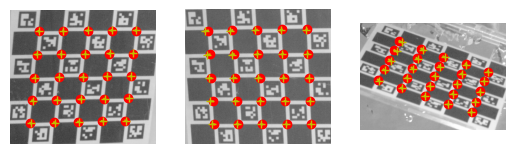

In [15]:
fig = triangulate_sleap.plot_reprojected_points(boardpts, 1600, videonames)